In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
tf.random.set_seed(7)

In [14]:
dataframe = pd.read_csv('/Users/chris/OneDrive/Documents/coventry semester 2 notes/air_data.csv', usecols=[1], engine='python') 
dataset = dataframe.values
dataset = dataset.astype('float')

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [16]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [25]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

In [26]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [27]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 68ms/step
Train Score: 0.04 RMSE
Test Score: 153.45 RMSE


In [28]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1/1 - 7s - loss: 6.2641e-04 - 7s/epoch - 7s/step
Epoch 2/100
1/1 - 0s - loss: 5.4531e-04 - 8ms/epoch - 8ms/step
Epoch 3/100
1/1 - 0s - loss: 4.6986e-04 - 10ms/epoch - 10ms/step
Epoch 4/100
1/1 - 0s - loss: 4.0018e-04 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 3.3634e-04 - 0s/epoch - 0s/step
Epoch 6/100
1/1 - 0s - loss: 2.7843e-04 - 4ms/epoch - 4ms/step
Epoch 7/100
1/1 - 0s - loss: 2.2644e-04 - 14ms/epoch - 14ms/step
Epoch 8/100
1/1 - 0s - loss: 1.8037e-04 - 0s/epoch - 0s/step
Epoch 9/100
1/1 - 0s - loss: 1.4015e-04 - 0s/epoch - 0s/step
Epoch 10/100
1/1 - 0s - loss: 1.0564e-04 - 17ms/epoch - 17ms/step
Epoch 11/100
1/1 - 0s - loss: 7.6667e-05 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 5.2983e-05 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 3.4276e-05 - 4ms/epoch - 4ms/step
Epoch 14/100
1/1 - 0s - loss: 2.0163e-05 - 2ms/epoch - 2ms/step
Epoch 15/100
1/1 - 0s - loss: 1.0204e-05 - 7ms/epoch - 7ms/step
Epoch 16/100
1/1 - 0s - loss: 3.8990e-06 - 6ms/epoc

In [32]:
tf.keras.callbacks.History()

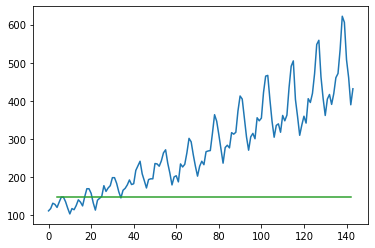

In [30]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()